# Convolutional Neural Network (CNN)  
Quelle: [tensorflow.org](https://www.tensorflow.org/tutorials/images/cnn?hl=en)

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0 , test_images / 255.0

170500096/170498071 [==============================] - 38s 0us/step


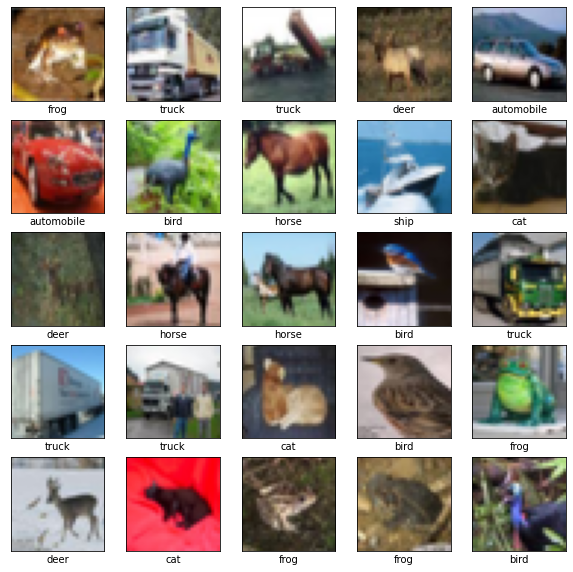

In [3]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.yticks([])
    plt.xticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [8]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 38s 3ms/step - loss: 1.7944 - accuracy: 0.3320 - val_loss: 1.2595 - val_accuracy: 0.5433
Epoch 2/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.2215 - accuracy: 0.5648 - val_loss: 1.0898 - val_accuracy: 0.6171
Epoch 3/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.0443 - accuracy: 0.6312 - val_loss: 1.0100 - val_accuracy: 0.6507
Epoch 4/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.9387 - accuracy: 0.6683 - val_loss: 1.0033 - val_accuracy: 0.6516
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.8709 - accuracy: 0.6957 - val_loss: 0.9157 - val_accuracy: 0.6854
Epoch 6/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.8027 - accuracy: 0.7203 - val_loss: 0.9512 - val_accuracy: 0.6738
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.7578 - accuracy: 0.7332 - val_loss: 0.9199 - val_accuracy

313/313 - 0s - loss: 0.8749 - accuracy: 0.7095


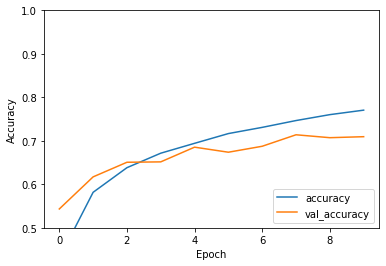

In [11]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0.5, 1])
plt.legend(loc="lower right")

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [12]:
print(test_acc)

0.7095000147819519
